In [5]:
!pip install cufflinks

In [7]:
!pip install mlxtend

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.4 MB 393.8 kB/s eta 0:00:04
   -- ------------------------------------- 0.1/1.4 MB 737.3 kB/s eta 0:00:02
   ------- -------------------------------- 0.3/1.4 MB 1.5 MB/s eta 0:00:01
   ---------------- ----------------------- 0.6/1.4 MB 2.7 MB/s eta 0:00:01
   --------------------------- ------------ 1.0/1.4 MB 3.7 MB/s eta 0:00:01
   --------------------------------- ------ 1.2/1.4 MB 3.8 MB/s eta 0:00:01
   -------------------------------------- - 1.4/1.4 MB 3.8 MB/s eta 0:00:01
   -------------------------------------- - 1.4/1.4 MB 3.7 MB/s eta 0:00:01
   -------------------------------------- - 1.4/1.4 MB 3.7 MB/s eta 0:00:01
   -------------------------------------- - 1.4/1.4 MB 3.7 MB/s eta 0:00:01
   --------------------------

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
%matplotlib inline
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import  RandomizedSearchCV, train_test_split , GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from mlxtend.plotting import plot_confusion_matrix
#To turn off warning messages.
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Importing the dataset 
data = pd.read_csv("heart.csv")  
data.head()  

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


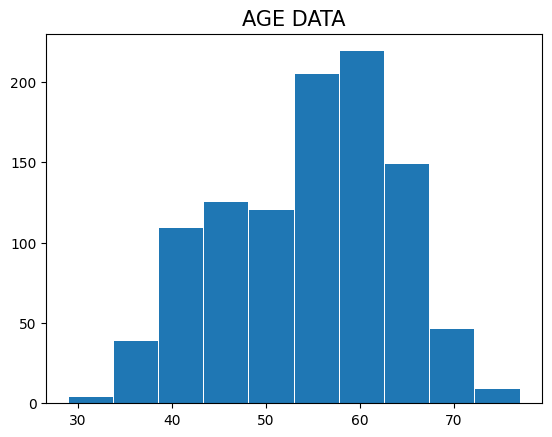

In [3]:
plt.hist(data.age, rwidth=0.98)
plt.title("AGE DATA",fontsize=15)
plt.show()

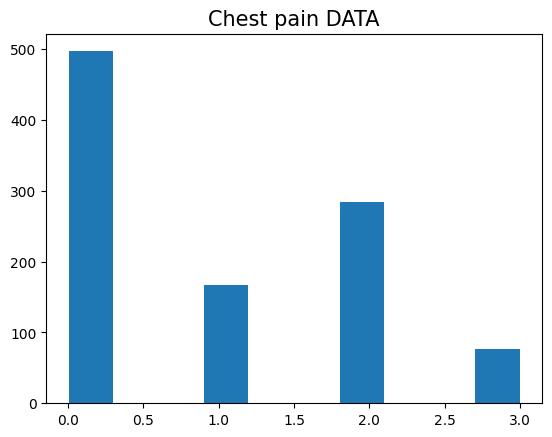

In [4]:
plt.hist(data.cp, rwidth=0.98)
plt.title("Chest pain DATA",fontsize=15)
plt.show()

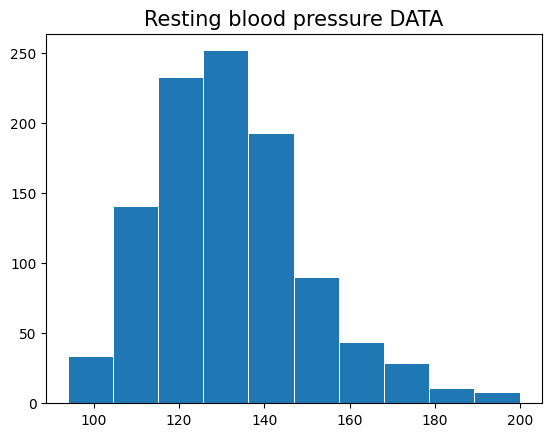

In [5]:
plt.hist(data.trestbps, rwidth=0.98)
plt.title("Resting blood pressure DATA",fontsize=15)
plt.show()

In [6]:
n_cols = {'cp':'Chest Pain Type (CP)',
          'trestbps':'Resting Blood Pressure (trestbps)',
          'chol':'Serum Cholestoral (chol) mg/dl',
          'fbs':  'Fasting Blood Sugar (fbs) > 120 mg/dl',
          'restecg': 'Resting Electrocardiographic Results (restecg)',
          'thalach' : 'Maximum Heart Rate Achieved (thalach)',
          'exang': 'Exercise Induced Angina (exang)',
          'oldpeak' : 'ST depression (oldpeak)' ,
          'slope' : 'Slope of the ST Segment (slope)',
          'ca' : 'Number of Major Vessels (ca)',
          'thal' : 'Thal'}

data.rename(columns=n_cols ,inplace=True)
data.head()

,age,sex,Chest Pain Type (CP),Resting Blood Pressure (trestbps),Serum Cholestoral (chol) mg/dl,Fasting Blood Sugar (fbs) > 120 mg/dl,Resting Electrocardiographic Results (restecg),Maximum Heart Rate Achieved (thalach),Exercise Induced Angina (exang),ST depression (oldpeak),Slope of the ST Segment (slope),Number of Major Vessels (ca),Thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   age                                             1025 non-null   int64  
 1   sex                                             1025 non-null   int64  
 2   Chest Pain Type (CP)                            1025 non-null   int64  
 3   Resting Blood Pressure (trestbps)               1025 non-null   int64  
 4   Serum Cholestoral (chol) mg/dl                  1025 non-null   int64  
 5   Fasting Blood Sugar (fbs) > 120 mg/dl           1025 non-null   int64  
 6   Resting Electrocardiographic Results (restecg)  1025 non-null   int64  
 7   Maximum Heart Rate Achieved (thalach)           1025 non-null   int64  
 8   Exercise Induced Angina (exang)                 1025 non-null   int64  
 9   ST depression (oldpeak)                  

In [8]:
data.isnull().sum()

age                                               0
sex                                               0
Chest Pain Type (CP)                              0
Resting Blood Pressure (trestbps)                 0
Serum Cholestoral (chol) mg/dl                    0
Fasting Blood Sugar (fbs) > 120 mg/dl             0
Resting Electrocardiographic Results (restecg)    0
Maximum Heart Rate Achieved (thalach)             0
Exercise Induced Angina (exang)                   0
ST depression (oldpeak)                           0
Slope of the ST Segment (slope)                   0
Number of Major Vessels (ca)                      0
Thal                                              0
target                                            0
dtype: int64

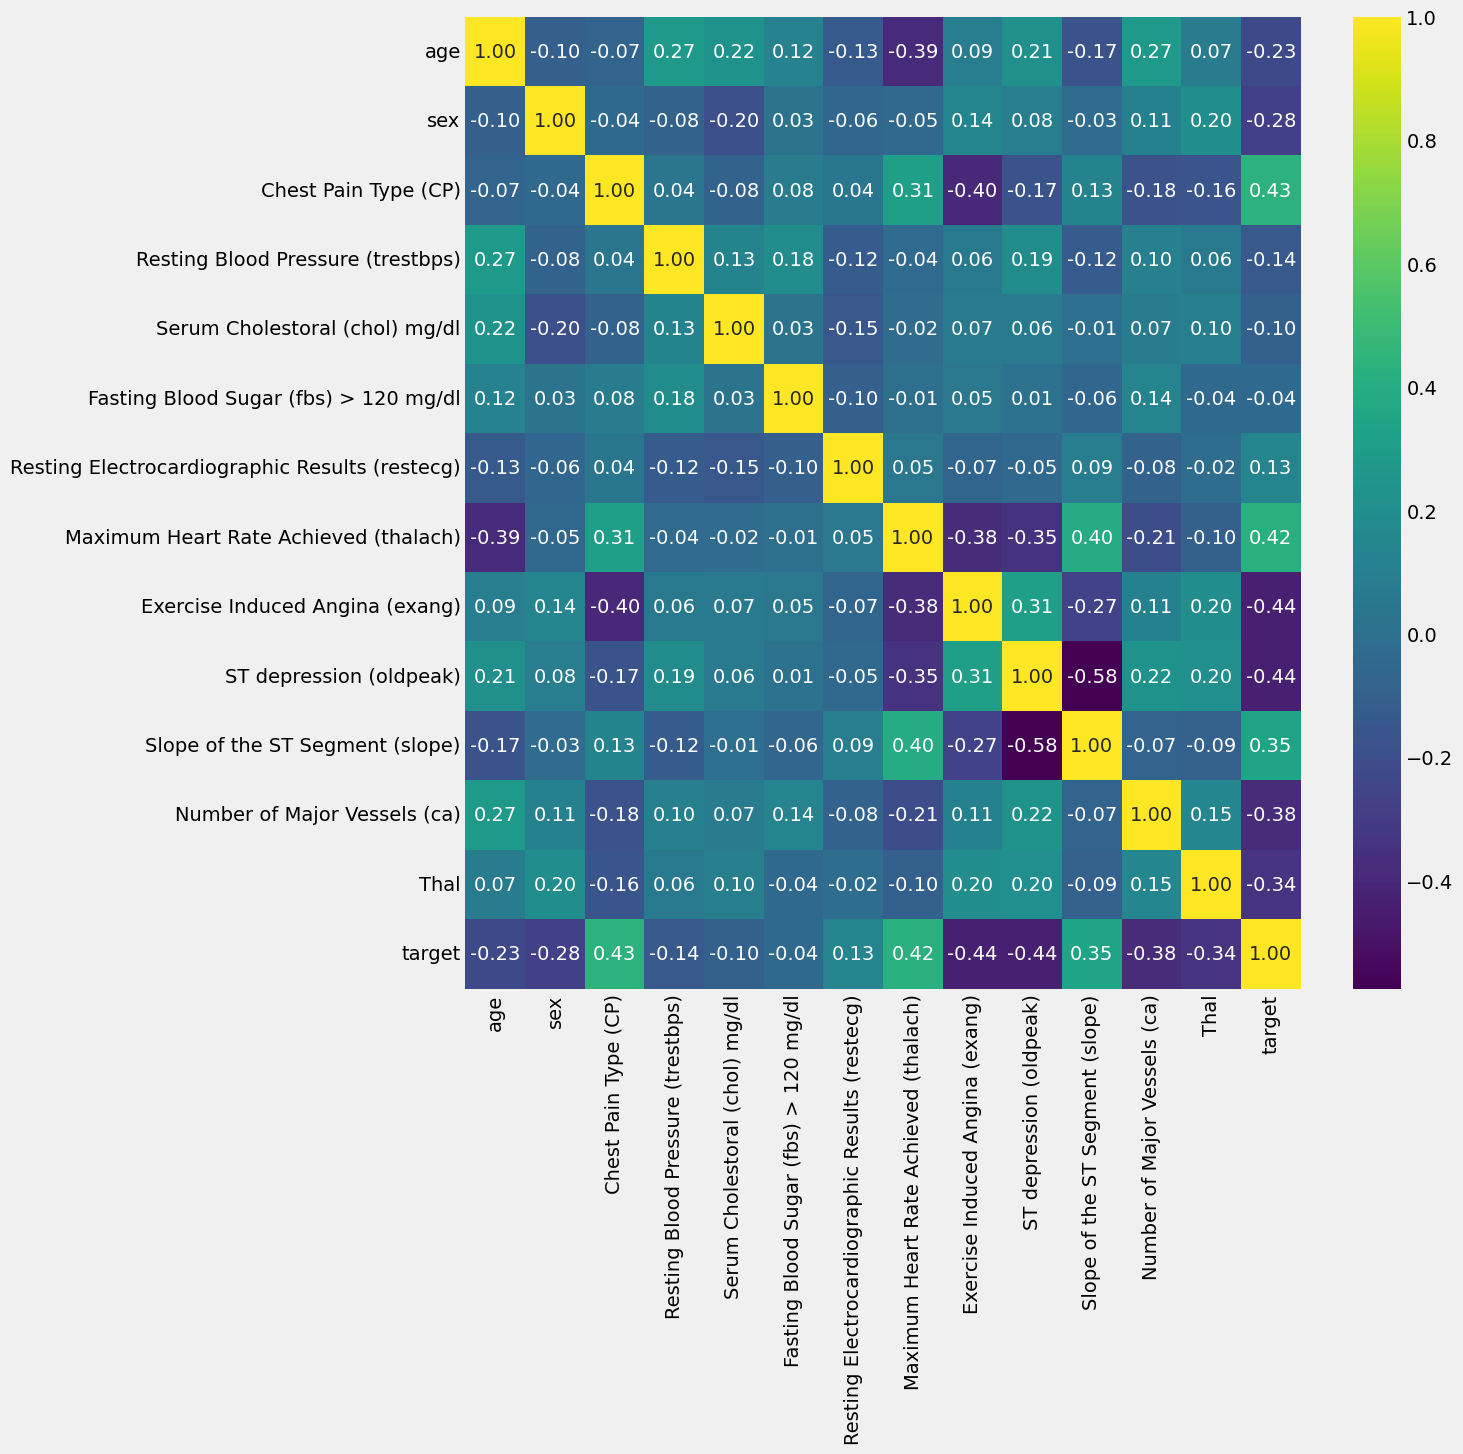

In [9]:
#Colerration check.
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 12))
sns.heatmap(data.corr(),annot=True,fmt = ".2f",cmap='viridis')
plt.show()

In [10]:
#Clculate age
minAge=min(data.age)
maxAge=max(data.age)
meanAge=data.age.mean()
print("min =",minAge ,"max =", maxAge , "mean =",meanAge)

min = 29 max = 77 mean = 54.43414634146342


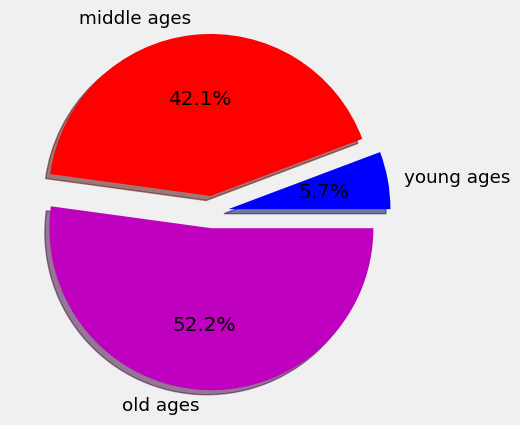

In [11]:
#Prepare ages for a bie chart
Young = data[(data.age>=29)&(data.age<40)]
Middle = data[(data.age>=40)&(data.age<55)]
Old = data[(data.age>55)]
plt.style.use('fivethirtyeight')
colors = ['b','r','m']
explode = [0.1,0.1,0.1]
plt.figure(figsize=(5,5))
sns.set_context('notebook',font_scale = 1.2)
plt.pie([len(Young),len(Middle),len(Old)],labels=['young ages','middle ages','old ages'],explode=explode,shadow=True,colors=colors, autopct='%1.1f%%')
plt.show()

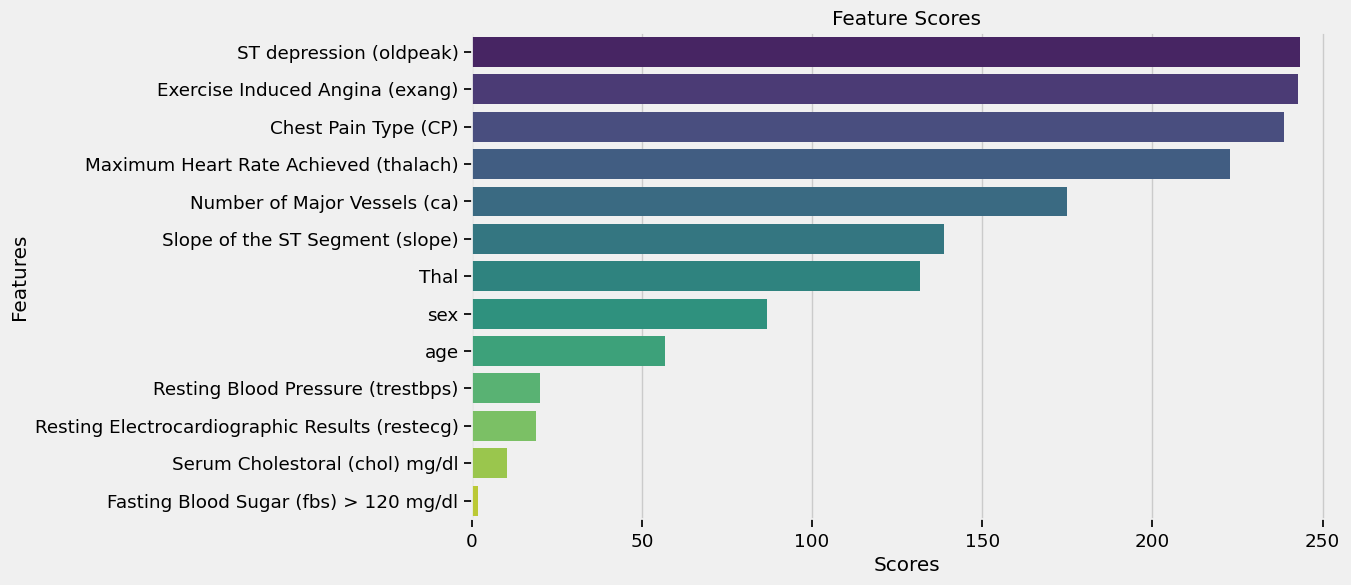

In [13]:
 X = X.drop(["Fasting Blood Sugar (fbs) > 120 mg/dl","Serum Cholestoral (chol) mg/dl",
            "Resting Electrocardiographic Results (restecg)","Resting Blood Pressure (trestbps)"], axis = 1) 

In [14]:
#Scale all values for good Accuracy
sc = StandardScaler()
col = ['age',
       'sex',
       'Chest Pain Type (CP)',
       'Thal',
       'Exercise Induced Angina (exang)',
       'Slope of the ST Segment (slope)',
       'Number of Major Vessels (ca)',
       'Maximum Heart Rate Achieved (thalach)', 
       'ST depression (oldpeak)']
X[col] = sc.fit_transform(X[col])
X.head()

,age,sex,Chest Pain Type (CP),Maximum Heart Rate Achieved (thalach),Exercise Induced Angina (exang),ST depression (oldpeak),Slope of the ST Segment (slope),Number of Major Vessels (ca),Thal
0,-0.268437,0.661504,-0.915755,0.821321,-0.712287,-0.060888,0.995433,1.209221,1.089852
1,-0.158157,0.661504,-0.915755,0.255968,1.403928,1.727137,-2.243675,-0.731971,1.089852
2,1.716595,0.661504,-0.915755,-1.048692,1.403928,1.301417,-2.243675,-0.731971,1.089852
3,0.724079,0.661504,-0.915755,0.516900,-0.712287,-0.912329,0.995433,0.238625,1.089852
4,0.834359,-1.511706,-0.915755,-1.874977,-0.712287,0.705408,-0.624121,2.179817,-0.522122


In [15]:
#Splitting the data into the training and testing set  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42) 

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


**1.Random Forest**

In [18]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the training data
train_preds_rf = rf_model.predict(X_train)
train_accuracy_rf = accuracy_score(y_train, train_preds_rf)
print(f"Random Forest Training Accuracy: {train_accuracy_rf}")

# Predict on the testing data
test_preds_rf = rf_model.predict(X_test)
test_accuracy_rf = accuracy_score(y_test, test_preds_rf)
print(f"Random Forest Testing Accuracy: {test_accuracy_rf}")

# Additional evaluation metrics
print("Random Forest Classification Report:")
print(classification_report(y_test, test_preds_rf))
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, test_preds_rf))

Random Forest Training Accuracy: 1.0
Random Forest Testing Accuracy: 0.9805194805194806
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       159
           1       1.00      0.96      0.98       149

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308

Random Forest Confusion Matrix:
[[159   0]
 [  6 143]]


**2. Decision tree**

In [20]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Predict on the training data
train_preds_dt = dt_model.predict(X_train)
train_accuracy_dt = accuracy_score(y_train, train_preds_dt)
print(f"Decision Tree Training Accuracy: {train_accuracy_dt}")

# Predict on the testing data
test_preds_dt = dt_model.predict(X_test)
test_accuracy_dt = accuracy_score(y_test, test_preds_dt)
print(f"Decision Tree Testing Accuracy: {test_accuracy_dt}")

# Additional evaluation metrics
print("Decision Tree Classification Report:")
print(classification_report(y_test, test_preds_dt))
print("Decision Tree Confusion Matrix:")
print(confusion_matrix(y_test, test_preds_dt))

Decision Tree Training Accuracy: 1.0
Decision Tree Testing Accuracy: 0.9707792207792207
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       159
           1       1.00      0.94      0.97       149

    accuracy                           0.97       308
   macro avg       0.97      0.97      0.97       308
weighted avg       0.97      0.97      0.97       308

Decision Tree Confusion Matrix:
[[159   0]
 [  9 140]]


**3. Logistic Regression**

In [21]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression Classifier
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
lr_model.fit(X_train, y_train)

# Predict on the training data
train_preds_lr = lr_model.predict(X_train)
train_accuracy_lr = accuracy_score(y_train, train_preds_lr)
print(f"Logistic Regression Training Accuracy: {train_accuracy_lr}")

# Predict on the testing data
test_preds_lr = lr_model.predict(X_test)
test_accuracy_lr = accuracy_score(y_test, test_preds_lr)
print(f"Logistic Regression Testing Accuracy: {test_accuracy_lr}")
# Additional evaluation metrics
print("Logistic Regression Classification Report:")
print(classification_report(y_test, test_preds_lr))
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, test_preds_lr))

Logistic Regression Training Accuracy: 0.8605299860529986
Logistic Regression Testing Accuracy: 0.8246753246753247
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.77      0.82       159
           1       0.78      0.89      0.83       149

    accuracy                           0.82       308
   macro avg       0.83      0.83      0.82       308
weighted avg       0.83      0.82      0.82       308

Logistic Regression Confusion Matrix:
[[122  37]
 [ 17 132]]


**4. SVM**

In [22]:
# Initialize the SVM Classifier
svm_model = SVC(kernel='linear', random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Predict on the training data
train_preds_svm = svm_model.predict(X_train)
train_accuracy_svm = accuracy_score(y_train, train_preds_svm)
print(f"SVM Training Accuracy: {train_accuracy_svm}")
# Predict on the testing data
test_preds_svm = svm_model.predict(X_test)
test_accuracy_svm = accuracy_score(y_test, test_preds_svm)
print(f"SVM Testing Accuracy: {test_accuracy_svm}")

# Additional evaluation metrics
print("SVM Classification Report:")
print(classification_report(y_test, test_preds_svm))
print("SVM Confusion Matrix:")
print(confusion_matrix(y_test, test_preds_svm))

SVM Training Accuracy: 0.8577405857740585
SVM Testing Accuracy: 0.8214285714285714
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.75      0.81       159
           1       0.77      0.90      0.83       149

    accuracy                           0.82       308
   macro avg       0.83      0.82      0.82       308
weighted avg       0.83      0.82      0.82       308

SVM Confusion Matrix:
[[119  40]
 [ 15 134]]


**5. KNN**

In [23]:
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (n_neighbors) as needed

# Train the model
knn_model.fit(X_train, y_train)

# Predict on the training data
train_preds_knn = knn_model.predict(X_train)
train_accuracy_knn = accuracy_score(y_train, train_preds_knn)
print(f"KNN Training Accuracy: {train_accuracy_knn}")

# Predict on the testing data
test_preds_knn = knn_model.predict(X_test)
test_accuracy_knn = accuracy_score(y_test, test_preds_knn)
print(f"KNN Testing Accuracy: {test_accuracy_knn}")

# Additional evaluation metrics
print("KNN Classification Report:")
print(classification_report(y_test, test_preds_knn))
print("KNN Confusion Matrix:")
print(confusion_matrix(y_test, test_preds_knn))

KNN Training Accuracy: 0.9400278940027894
KNN Testing Accuracy: 0.8798701298701299
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.86      0.88       159
           1       0.85      0.91      0.88       149

    accuracy                           0.88       308
   macro avg       0.88      0.88      0.88       308
weighted avg       0.88      0.88      0.88       308

KNN Confusion Matrix:
[[136  23]
 [ 14 135]]


**Comparing all the algorithms**

In [24]:
final_data = pd.DataFrame({'Models':['RF','DT','LR','SVM','KNN'],
                           'ACC':[accuracy_score(y_test,test_preds_rf),
                                 accuracy_score(y_test,test_preds_dt),
                                 accuracy_score(y_test,test_preds_lr),
                                 accuracy_score(y_test,test_preds_svm),
                                 accuracy_score(y_test,test_preds_knn)]})

final_data

,Models,ACC
0,RF,0.980519
1,DT,0.970779
2,LR,0.824675
3,SVM,0.821429
4,KNN,0.879870


<Axes: xlabel='Models', ylabel='ACC'>

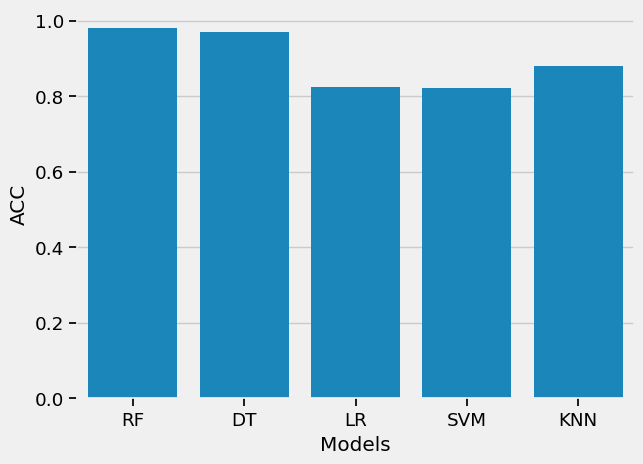

In [25]:
sns.barplot(x=final_data['Models'], y=final_data['ACC'])

In [26]:
# Cross-Validation for Random Forest
cv_scores_rf = cross_val_score(rf_model, X, y, cv=5)
print(f"Cross-Validation Scores (Random Forest): {cv_scores_rf}")
print(f"Mean Cross-Validation Score (Random Forest): {cv_scores_rf.mean()}")

# Cross-Validation for Decision Tree
cv_scores_dt = cross_val_score(dt_model, X, y, cv=5)
print(f"Cross-Validation Scores (Decision Tree): {cv_scores_dt}")
print(f"Mean Cross-Validation Score (Decision Tree): {cv_scores_dt.mean()}")

# Cross-Validation for Logistic Regression
cv_scores_lr = cross_val_score(lr_model, X, y, cv=5)
print(f"Cross-Validation Scores (Logistic Regression): {cv_scores_lr}")
print(f"Mean Cross-Validation Score (Logistic Regression): {cv_scores_lr.mean()}")

# Cross-Validation for SVM
cv_scores_svm = cross_val_score(svm_model, X, y, cv=5)
print(f"Cross-Validation Scores (SVM): {cv_scores_svm}")
print(f"Mean Cross-Validation Score (SVM): {cv_scores_svm.mean()}")

# Cross-Validation for KNN
cv_scores_knn = cross_val_score(knn_model, X, y, cv=5)
print(f"Cross-Validation Scores (KNN): {cv_scores_knn}")
print(f"Mean Cross-Validation Score (KNN): {cv_scores_knn.mean()}")

Cross-Validation Scores (Random Forest): [0.98536585 1.         0.98536585 0.98536585 0.98536585]
Mean Cross-Validation Score (Random Forest): 0.9882926829268293
Cross-Validation Scores (Decision Tree): [1.         1.         0.98536585 1.         0.98536585]
Mean Cross-Validation Score (Decision Tree): 0.9941463414634146
Cross-Validation Scores (Logistic Regression): [0.89756098 0.84878049 0.89756098 0.81463415 0.7902439 ]
Mean Cross-Validation Score (Logistic Regression): 0.8497560975609757
Cross-Validation Scores (SVM): [0.87317073 0.85365854 0.87317073 0.80487805 0.79512195]
Mean Cross-Validation Score (SVM): 0.8400000000000001
Cross-Validation Scores (KNN): [0.83414634 0.85365854 0.91707317 0.86829268 0.85853659]
Mean Cross-Validation Score (KNN): 0.8663414634146342


**PREDICT ON NEW DATA**

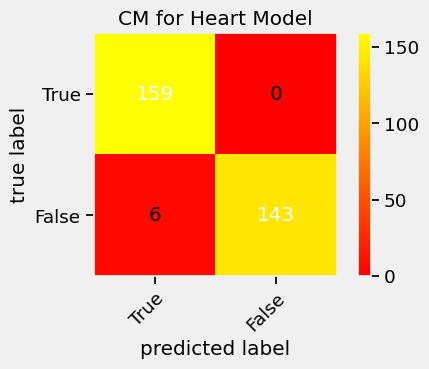

In [27]:
cm_rnf = confusion_matrix(y_test, test_preds_rf)
fig, ax = plot_confusion_matrix(conf_mat=cm_rnf ,
                                show_absolute=True,
                                colorbar=True,
                                cmap='autumn',
                               class_names = [True , False ],
                               figsize=(5, 3))
plt.title("CM for Heart Model")
plt.show()

**TEST WITH NEW DATASET**

In [28]:
!pip install imblearn

In [29]:
cm_rnf = confusion_matrix(y_test, test_preds_rf)
fig, ax = plot_confusion_matrix(conf_mat=cm_rnf ,
                                show_absolute=True,
                                colorbar=True,
                                cmap='autumn',
                               class_names = [True , False ],
                               figsize=(5, 3))
plt.title("CM for Heart Model")
plt.show()

[(0, 526), (1, 526)]


In [30]:
y_pred_rf=rf_model.predict(X_resampled)

In [31]:
ac_rf = accuracy_score(y_resampled, y_pred_rf)
print("Accuracy score for model " f'{rf_model} : ',ac_rf)
cr_rf = classification_report(y_resampled, y_pred_rf)
print("classification_report for model " f'{rf_model} : \n',cr_rf)

Accuracy score for model RandomForestClassifier(random_state=42) :  0.9942965779467681
classification_report for model RandomForestClassifier(random_state=42) : 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       526
           1       1.00      0.99      0.99       526

    accuracy                           0.99      1052
   macro avg       0.99      0.99      0.99      1052
weighted avg       0.99      0.99      0.99      1052



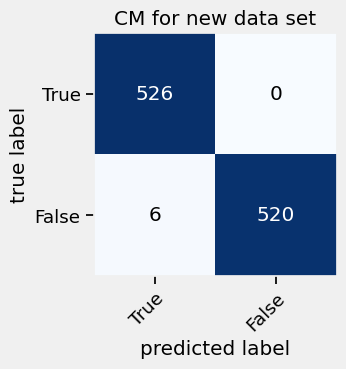

In [32]:
cm_rnf = confusion_matrix(y_resampled, y_pred_rf)
fig, ax = plot_confusion_matrix(conf_mat=cm_rnf , show_absolute=True, class_names = [True , False ],figsize=(5, 3))
plt.title('CM for new data set')
plt.show()